### 2f. Unit tangent vector, unit normal vector, curvature, (Matrix representation)

If $ds = \sqrt{dx^2 + dy^2 + dz^2}$ is the arclength element $ds/dt = \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } = |d\vec{r}/dt| = |\vec{v}|$ then the other quantities of importance are

  * Unit Tangent vector: $\vec{T} = \frac{d\vec{r}}{dt}\frac{1}{|d\vec{r}/dt|} = \vec{v}/|\vec{v}|$
  
  * Curvature:  $ \kappa = |\frac{d\vec{T}}{dt}|\frac{1}{|\vec{v}|} $
  
  
  * Unit normal vector to curve:   $ \vec{N} = \frac{d\vec{T}/dt}{|d\vec{T}/dt|} $
  
  **Problem**. Find all these for the curve $ \vec{r}(t) = \left<a\cos(t)e^t, b\sin(t), ct\right> $, where $ a, b, c $ are parameters and t is time variable. [Youtube Mr.P Solver: 2nd Year Calculus, But in PYTHON]

In [1]:
import numpy as np
import sympy as smp
from sympy.vector import *
import matplotlib.pyplot as plt

In [2]:
t, a, b, c = smp.symbols('t a b c', pos=True, real=True)

r = smp.Matrix([a*smp.cos(t)*smp.exp(t), b*smp.sin(t), c*t])           # Define the path
r
 


Matrix([
[a*exp(t)*cos(t)],
[       b*sin(t)],
[            c*t]])

Define the velocity vector  $\vec{v}$   and speed $|\vec{v}|$.

In [3]:
v = smp.diff(r, t)
v_norm = v.norm()    


Get $\vec{T},  \kappa$ and   $\vec{N}$.

In [4]:
T = v/v_norm
kappa = smp.diff(T, t).norm()/v_norm
N = smp.diff(T,t)/smp.diff(T,t).norm()

Can evaluate these quantities or make plots

In [5]:
T_2 = T.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()
T_2

Matrix([
[ -0.984293156774139],
[-0.0557646995029986],
[  0.167503074052208]])

In [6]:
kappa.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()

0.00775458595406284

In [7]:
N_2 = N.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()
N_2

Matrix([
[-0.152946073876551],
[-0.204518432770271],
[-0.966840063890063]])

In [8]:
print(N_2.dot(N_2))  # Unity check
print(T_2.dot(N_2))  # perpendicularity check

1.00000000000000
0


Can also make continuous plots

In [9]:
kappa_num = smp.lambdify([t,a,b,c], kappa)

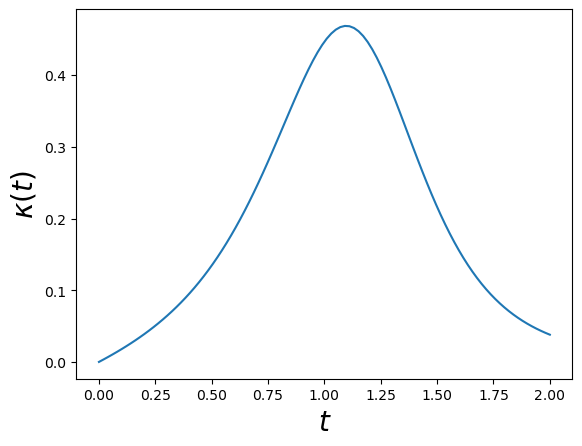

In [10]:
tt = np.linspace(0, 2, 100)
kk = kappa_num(tt, 1, 2, 3)
plt.plot(tt, kk)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$\kappa(t)$', fontsize=20)
plt.show()